In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# EDA

In [70]:
dados = pd.read_csv("C:\Projetos Pessoais\DataScience\segmentacao_Clientes_Ecomerce\data\dados_limpos_pre_EDA.csv")

In [71]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,08:26:00,2010-12-01
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,08:26:00,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
...,...,...,...,...,...,...,...,...,...
527787,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12:50:00,2011-12-09
527788,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12:50:00,2011-12-09
527789,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12:50:00,2011-12-09
527790,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,12:50:00,2011-12-09


In [72]:
dados['Horario_venda'] = pd.to_datetime(dados['Horario_venda'])
dados['Data_venda'] = pd.to_datetime(dados['Data_venda'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527792 entries, 0 to 527791
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Codigo          527792 non-null  object        
 1   Descricao       527792 non-null  object        
 2   Quantidade      527792 non-null  int64         
 3   Valor_unitario  527792 non-null  float64       
 4   Cod_cliente     527792 non-null  int64         
 5   Pais            527792 non-null  object        
 6   Valor_total     527792 non-null  float64       
 7   Horario_venda   527792 non-null  datetime64[ns]
 8   Data_venda      527792 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 36.2+ MB


In [73]:
# Criação das variáveis mês e ano
dados['Mes'] = dados['Data_venda'].dt.month
dados['Ano'] = dados['Data_venda'].dt.year

In [74]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda,Mes,Ano
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,2023-10-21 08:26:00,2010-12-01,12,2010
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,2023-10-21 08:26:00,2010-12-01,12,2010
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,2023-10-21 08:26:00,2010-12-01,12,2010
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,2023-10-21 08:26:00,2010-12-01,12,2010
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,2023-10-21 08:26:00,2010-12-01,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
527787,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,2023-10-21 12:50:00,2011-12-09,12,2011
527788,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,2023-10-21 12:50:00,2011-12-09,12,2011
527789,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,2023-10-21 12:50:00,2011-12-09,12,2011
527790,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,2023-10-21 12:50:00,2011-12-09,12,2011


In [75]:
dados.describe(include='object').T

,count,unique,top,freq
Codigo,527792,3913,85123A,2265
Descricao,527792,4018,WHITE HANGING HEART T-LIGHT HOLDER,2323
Pais,527792,38,United Kingdom,484038


In [76]:
# Vendas gerais
vendas_Gerais = dados.groupby('Pais')['Valor_total'].sum().sort_values(ascending = False).reset_index()
vendas_Gerais.head()

,Pais,Valor_total
0,United Kingdom,8748247.473
1,Netherlands,283889.340
2,EIRE,271164.300
3,Germany,205569.890
4,France,184582.740


In [77]:
# Participação do Reino Unido do faturamento da empresa
vendas_Gerais['Valor_total'].sum()

# Participação UK é de 85% do faturamento da empresa

10272118.873

# Como a maior parte do faturamento da empresa advém do Reino Unido, farei toda a análise voltada para os clientes desta região

In [78]:
dados['Pais'].value_counts(normalize=True).head()

Pais
United Kingdom    0.917100
Germany           0.016404
France            0.015347
EIRE              0.014739
Spain             0.004589
Name: proportion, dtype: float64

### Venda de produtos por horário

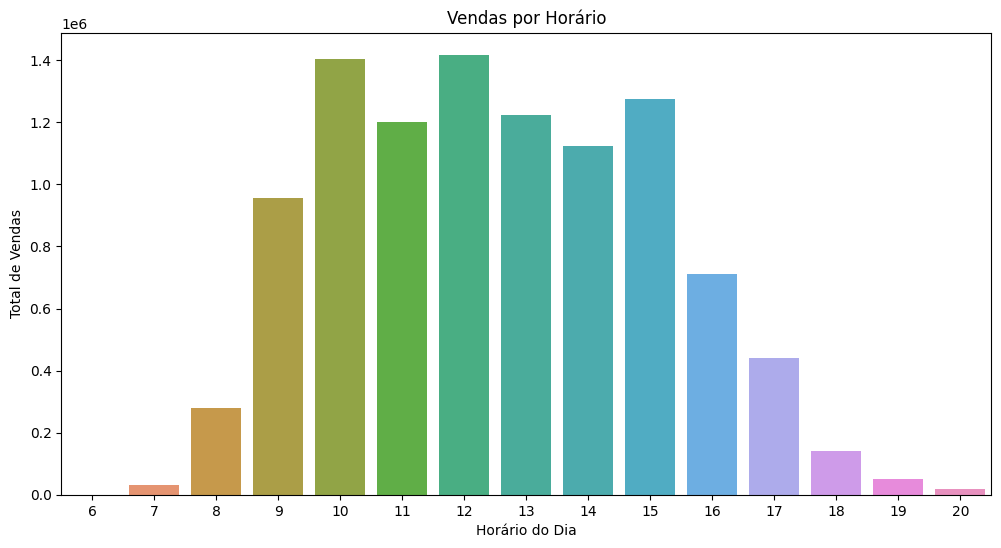

In [79]:
# Vendas de Produtos por horário

vendas_por_horario = dados.groupby(dados['Horario_venda'].dt.hour)['Valor_total'].sum().reset_index()

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_horario, x='Horario_venda', y='Valor_total')
plt.title('Vendas por Horário')
plt.xlabel('Horário do Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos horários na horizontal
plt.show()

### Venda de produtos por mês

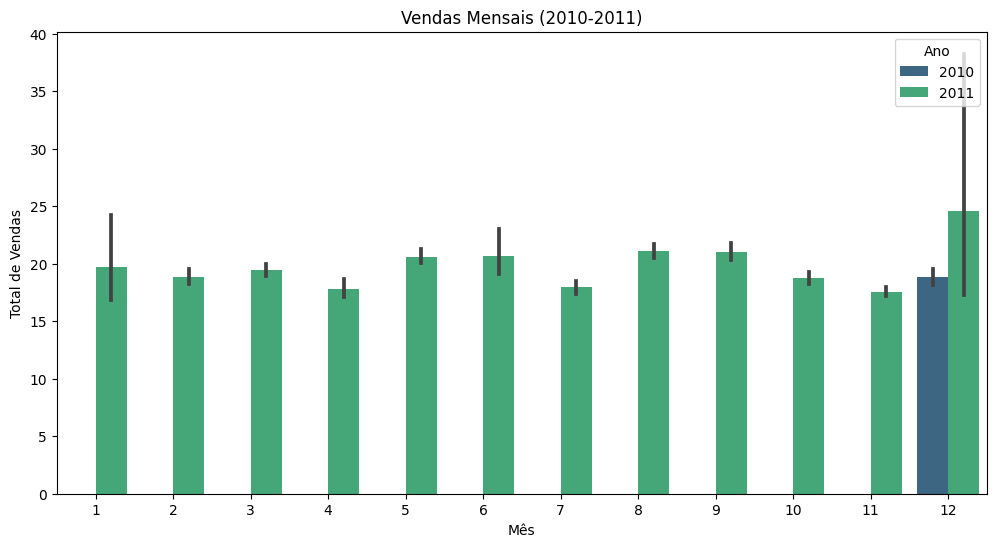

In [80]:
# Vendas de produtos por mês

dados_filtrados = dados[(dados['Ano'] == 2010) | ((dados['Ano'] == 2011) & (dados['Mes'] <= 12))]

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=dados_filtrados, x='Mes', y='Valor_total', hue='Ano', palette='viridis')
plt.title('Vendas Mensais (2010-2011)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos meses na horizontal
plt.legend(title='Ano')
plt.show()

## Quantidades de produtos com maiores saídas

In [81]:
dados[dados['Cod_cliente'] == 12346]

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda,Mes,Ano
60013,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346,United Kingdom,77183.6,2023-10-21 10:01:00,2011-01-18,1,2011


### Aplicando metodologia RFM

- Criarei outro dataframe para realizar a junção dos dados relevantes de cada cliente e produtos, para utilizar posteriormente no pre processamento dos dados e segmentação

- Intuito também é diminuir dimensionalidade

In [82]:
dados.columns

Index(['Codigo', 'Descricao', 'Quantidade', 'Valor_unitario', 'Cod_cliente',
       'Pais', 'Valor_total', 'Horario_venda', 'Data_venda', 'Mes', 'Ano'],
      dtype='object')

## R - Regency

- Inclusão de Cod_Cliente
- Ultima_Compra: Dias desde a ultima compra de cada cliente

In [83]:
dados_clientes = dados.groupby('Cod_cliente')['Data_venda'].max().reset_index()

# Data da última compra
ultima_compra = dados['Data_venda'].max()

# converte data para o tipo datetime
dados_clientes['Data_venda'] = pd.to_datetime(dados_clientes['Data_venda'])
ultima_compra = pd.to_datetime(ultima_compra)

# Dias desde a ultima compra de cada cliente
dados_clientes['Ultima_Compra'] = (ultima_compra - dados_clientes['Data_venda']).dt.days

# remove a data do dataframe
dados_clientes.drop(columns=['Data_venda'], inplace=True)

dados_clientes.head()

,Cod_cliente,Ultima_Compra
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


## F - Frequency

- Campo de Total de transações 
- Campo de Quantidade de itens comprados

In [84]:
# Total de transações por cliente

total_transacoes = dados.groupby('Cod_cliente')['Cod_cliente'].count().reset_index(name='Total_transacoes')
total_transacoes

,Cod_cliente,Total_transacoes
0,12346,1
1,12347,182
2,12348,27
3,12349,72
4,12350,16
...,...,...
5561,21821,2
5562,21822,634
5563,21823,730
5564,21824,59


In [85]:
# Quantidade de produtos comprados por cliente

total_quantidade = dados.groupby('Cod_cliente')['Quantidade'].sum().reset_index(name = 'Qtd_comprada')
total_quantidade

,Cod_cliente,Qtd_comprada
0,12346,74215
1,12347,2458
2,12348,2332
3,12349,630
4,12350,196
...,...,...
5561,21821,2
5562,21822,1747
5563,21823,2010
5564,21824,654


In [86]:
# Junção dos 2 DF's e merge com o DF principal
dados_clientes = pd.merge(dados_clientes, total_transacoes, on='Cod_cliente')
dados_clientes = pd.merge(dados_clientes, total_quantidade, on='Cod_cliente')
dados_clientes.head()

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada
0,12346,325,1,74215
1,12347,2,182,2458
2,12348,75,27,2332
3,12349,18,72,630
4,12350,310,16,196


In [87]:
# dados_clientes = dados_clientes.drop(columns=['Total_transacoes_x', 'Total_transacoes_y'])
dados_clientes.columns

Index(['Cod_cliente', 'Ultima_Compra', 'Total_transacoes', 'Qtd_comprada'], dtype='object')

In [88]:
dados_clientes

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada
0,12346,325,1,74215
1,12347,2,182,2458
2,12348,75,27,2332
3,12349,18,72,630
4,12350,310,16,196
...,...,...,...,...
5561,21821,1,2,2
5562,21822,1,634,1747
5563,21823,0,730,2010
5564,21824,0,59,654


### M - Monetary

In [89]:
# Gasto total por cliente 
gasto_total = dados.groupby('Cod_cliente')['Valor_total'].sum().reset_index(name = 'Valor_total_gasto')
gasto_total

,Cod_cliente,Valor_total_gasto
0,12346,77183.60
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40
...,...,...
5561,21821,3.35
5562,21822,5699.00
5563,21823,6756.06
5564,21824,3217.20


In [90]:
dados_clientes = pd.merge(dados_clientes, gasto_total, on='Cod_cliente')
dados_clientes.head()

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto
0,12346,325,1,74215,77183.60
1,12347,2,182,2458,4310.00
2,12348,75,27,2332,1437.24
3,12349,18,72,630,1457.55
4,12350,310,16,196,294.40


In [91]:
dados_clientes.columns

Index(['Cod_cliente', 'Ultima_Compra', 'Total_transacoes', 'Qtd_comprada',
       'Valor_total_gasto'],
      dtype='object')

In [92]:
dados_clientes['Avg_transacao'] = round(dados_clientes['Valor_total_gasto'] / dados_clientes['Total_transacoes'], 2)

In [93]:
dados_clientes.head()

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao
0,12346,325,1,74215,77183.60,77183.60
1,12347,2,182,2458,4310.00,23.68
2,12348,75,27,2332,1437.24,53.23
3,12349,18,72,630,1457.55,20.24
4,12350,310,16,196,294.40,18.40


In [94]:
# Calculate the number of unique products purchased by each customer
diversidade_produtos = dados.groupby('Cod_cliente')['Codigo'].nunique().reset_index()
diversidade_produtos.rename(columns={'Codigo': 'diversidade_produtos'}, inplace=True)

# Merge the new feature into the customer_data dataframe
dados_clientes = pd.merge(dados_clientes, diversidade_produtos, on='Cod_cliente')

# Display the first few rows of the customer_data dataframe
dados_clientes.head()

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos
0,12346,325,1,74215,77183.60,77183.60,1
1,12347,2,182,2458,4310.00,23.68,103
2,12348,75,27,2332,1437.24,53.23,21
3,12349,18,72,630,1457.55,20.24,72
4,12350,310,16,196,294.40,18.40,16


### Média de dias entre cada compra

Para entender melhor a frequencia com que cada cliente realiza a compra, criarei as seguintes variáveis: 

- Media_dias_entre_compras: frequência com que realiza uma compra
- Dia_da_semana: Dia da semana favorito para compra

Com essas informações, será possível traçar estratégias direcionadas e marketing pontual, nos dias que o cliente costuma comprar, além de oferecer promoções em horários próximos aos que costuma comprar 

In [95]:
# Construção de variaveis 'Dia_da_semana' e 'Hora' no dataset original
dados['Dia_da_semana'] = dados['Data_venda'].dt.weekday
dados['Hora'] = dados['Horario_venda'].dt.hour

In [96]:
# # Média de dias por cada compra
# media_dias = dados.groupby('Cod_cliente')['Data_venda'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
# media_dias_compra = media_dias.groupby('Cod_cliente').mean().reset_index()
# media_dias_compra.rename(columns={'Data_venda': 'Intervalo_compra_dias'}, inplace=True)

In [97]:
# Descobrindo o dia favorito de compra de cada cliente
dias_da_semana = dados.groupby(['Cod_cliente','Dia_da_semana']).size().reset_index(name = 'Contagem')
dia_favorito = dias_da_semana.loc[dias_da_semana.groupby('Cod_cliente')['Contagem'].idxmax()][['Cod_cliente', 'Dia_da_semana']]
dia_favorito

,Cod_cliente,Dia_da_semana
0,12346,1
2,12347,1
6,12348,3
8,12349,0
9,12350,2
...,...,...
11058,21821,3
11059,21822,3
11060,21823,4
11061,21824,4


In [98]:
# dia_favorito = pd.merge(dia_favorito, media_dias_compra, on='Cod_cliente')

In [99]:
# dia_favorito['Intervalo_compra_dias'] = dia_favorito['Intervalo_compra_dias'].astype(int)
# dia_favorito.sample(10)

In [100]:
# Inclusão no dataset dados_clientes
dados_clientes = pd.merge(dados_clientes, dia_favorito, on='Cod_cliente')

In [101]:
# Rename variável dia_da_semana para dia_favorito_compra
dados_clientes.rename(columns = {'Dia_da_semana': 'Dia_fav_compra'}, inplace = True)
dados_clientes.columns

Index(['Cod_cliente', 'Ultima_Compra', 'Total_transacoes', 'Qtd_comprada',
       'Valor_total_gasto', 'Avg_transacao', 'diversidade_produtos',
       'Dia_fav_compra'],
      dtype='object')

In [102]:
dados_clientes

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra
0,12346,325,1,74215,77183.60,77183.60,1,1
1,12347,2,182,2458,4310.00,23.68,103,1
2,12348,75,27,2332,1437.24,53.23,21,3
3,12349,18,72,630,1457.55,20.24,72,0
4,12350,310,16,196,294.40,18.40,16,2
...,...,...,...,...,...,...,...,...
5561,21821,1,2,2,3.35,1.68,2,3
5562,21822,1,634,1747,5699.00,8.99,634,3
5563,21823,0,730,2010,6756.06,9.25,730,4
5564,21824,0,59,654,3217.20,54.53,56,4


## Nacionalidade

In [103]:
dados['Pais'].value_counts(normalize = True).head().reset_index()

,Pais,proportion
0,United Kingdom,0.917100
1,Germany,0.016404
2,France,0.015347
3,EIRE,0.014739
4,Spain,0.004589


In [104]:
valor_paises = dados.groupby('Pais')['Valor_total'].sum().reset_index().sort_values(by = 'Valor_total', ascending = False)

In [105]:
valor_paises['pct'] = round((valor_paises['Valor_total'] / valor_paises['Valor_total'].sum()) * 100, 2)
valor_paises.head()

,Pais,Valor_total,pct
36,United Kingdom,8748247.473,85.16
24,Netherlands,283889.340,2.76
10,EIRE,271164.300,2.64
14,Germany,205569.890,2.00
13,France,184582.740,1.80


##### Como United Kingdon é responsável por 85% do faturamento da empresa e 91% da quantidade vendida, irei realizar o seguinte tratamento:

- Criação da variável "UK" booleana
- '1' para clientes residentes de "UK" e '0' para não residentes

In [106]:
# Atribuindo 0 ou 1 para a variável 'UK'

dados_UK = dados.groupby('Cod_cliente')['Pais'].unique().reset_index(name = 'UK')
dados_UK['UK'] = dados_UK['UK'].apply(lambda x: 1 if 'United Kingdom' in x else 0)
dados_UK.head()

,Cod_cliente,UK
0,12346,1
1,12347,0
2,12348,0
3,12349,0
4,12350,0


In [107]:
dados_clientes = pd.merge(dados_clientes, dados_UK, on = 'Cod_cliente')

In [108]:
dados_clientes

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK
0,12346,325,1,74215,77183.60,77183.60,1,1,1
1,12347,2,182,2458,4310.00,23.68,103,1,0
2,12348,75,27,2332,1437.24,53.23,21,3,0
3,12349,18,72,630,1457.55,20.24,72,0,0
4,12350,310,16,196,294.40,18.40,16,2,0
...,...,...,...,...,...,...,...,...,...
5561,21821,1,2,2,3.35,1.68,2,3,1
5562,21822,1,634,1747,5699.00,8.99,634,3,1
5563,21823,0,730,2010,6756.06,9.25,730,4,1
5564,21824,0,59,654,3217.20,54.53,56,4,1


## Padrões de Gastos por cliente

In [109]:
# Calculando Média de gastos mensais e Desvio padrão dos gastos

frequencia_gastos = dados.groupby(['Cod_cliente', 'Ano', 'Mes'])['Valor_total'].sum().reset_index()

# Calculando padrões sazonais
padroes_de_compra = frequencia_gastos.groupby('Cod_cliente')['Valor_total'].agg(['mean', 'std']).reset_index()
padroes_de_compra.rename(columns={'mean': 'Gastos_medios_mensais', 'std': 'Desvio_padrao_gastos_mensais'}, inplace=True)

# Verificando e atribuindo '0' quando variancia for NaN
padroes_de_compra['Desvio_padrao_gastos_mensais'].fillna(0, inplace=True)
padroes_de_compra

,Cod_cliente,Gastos_medios_mensais,Desvio_padrao_gastos_mensais
0,12346,77183.600000,0.000000
1,12347,615.714286,341.070789
2,12348,359.310000,203.875689
3,12349,1457.550000,0.000000
4,12350,294.400000,0.000000
...,...,...,...
5561,21821,3.350000,0.000000
5562,21822,5699.000000,0.000000
5563,21823,6756.060000,0.000000
5564,21824,3217.200000,0.000000


In [110]:
# Calculando o desvio padrão dos gastos mensais por cliente
desvio_padrao_gastos = padroes_de_compra.groupby('Cod_cliente')['Gastos_medios_mensais'].std().reset_index()
desvio_padrao_gastos.rename(columns={'Gastos_medios_mensais': 'Desvio_padrao_gastos_mensais'}, inplace=True)

# Agora, vamos calcular a tendência de compra usando a inclinação da linha de tendência linear
def calculate_trend(spend_data):
    # Se houver mais de um ponto de dados, calculamos a tendência usando regressão linear
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # Se houver apenas um ponto de dados, não é possível calcular a tendência, então retornamos 0
    else:
        return 0

# Aplicando a função calculate_trend para encontrar a tendência de gastos de cada cliente
tendencia_gastos = frequencia_gastos.groupby('Cod_cliente')['Valor_total'].apply(calculate_trend).reset_index()
tendencia_gastos.rename(columns={'Valor_total': 'Tendencia_gastos'}, inplace=True)

tendencia_gastos.sample(5)

,Cod_cliente,Tendencia_gastos
2718,16054,0.000
5358,21258,0.000
3421,17019,-15.149
1712,14676,-47.024
4956,20314,0.000


In [111]:
dados_clientes = pd.merge(dados_clientes, padroes_de_compra, on = 'Cod_cliente')
dados_clientes = pd.merge(dados_clientes, tendencia_gastos, on = 'Cod_cliente')

In [112]:
dados_clientes

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos
0,12346,325,1,74215,77183.60,77183.60,1,1,1,77183.600000,0.000000,0.000000
1,12347,2,182,2458,4310.00,23.68,103,1,0,615.714286,341.070789,4.486071
2,12348,75,27,2332,1437.24,53.23,21,3,0,359.310000,203.875689,-100.884000
3,12349,18,72,630,1457.55,20.24,72,0,0,1457.550000,0.000000,0.000000
4,12350,310,16,196,294.40,18.40,16,2,0,294.400000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,21821,1,2,2,3.35,1.68,2,3,1,3.350000,0.000000,0.000000
5562,21822,1,634,1747,5699.00,8.99,634,3,1,5699.000000,0.000000,0.000000
5563,21823,0,730,2010,6756.06,9.25,730,4,1,6756.060000,0.000000,0.000000
5564,21824,0,59,654,3217.20,54.53,56,4,1,3217.200000,0.000000,0.000000


In [113]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cod_cliente                   5566 non-null   int64  
 1   Ultima_Compra                 5566 non-null   int64  
 2   Total_transacoes              5566 non-null   int64  
 3   Qtd_comprada                  5566 non-null   int64  
 4   Valor_total_gasto             5566 non-null   float64
 5   Avg_transacao                 5566 non-null   float64
 6   diversidade_produtos          5566 non-null   int64  
 7   Dia_fav_compra                5566 non-null   int32  
 8   UK                            5566 non-null   int64  
 9   Gastos_medios_mensais         5566 non-null   float64
 10  Desvio_padrao_gastos_mensais  5566 non-null   float64
 11  Tendencia_gastos              5566 non-null   float64
dtypes: float64(5), int32(1), int64(6)
memory usage: 500.2 KB


## Verificação de valores anômalos - ou OUTLIERS

In [114]:
# Seus dados de entrada
X = dados_clientes

# Testando valores de contamination
contamination_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]

# Dicionário para armazenar os resultados
results = {}

# Loop através dos valores de 'contamination'

for contamination in contamination_values:
    model = IsolationForest(contamination=contamination, random_state=0)
    scores = cross_val_score(model, X, cv=5, scoring='neg_mean_squared_error')
    results[contamination] = -scores.mean()

# melhor valor de 'contamination' com base no erro médio quadrático
best_contamination = min(results, key=results.get)
best_mse = results[best_contamination]

print(f"Melhor valor de 'contamination': {best_contamination}")
print(f"Erro médio quadrático correspondente: {best_mse}")

Melhor valor de 'contamination': 0.01
Erro médio quadrático correspondente: nan


In [115]:
# Inicializando IsolationForest com parametro = 0.01
model = IsolationForest(contamination=0.01, random_state=0)

# Treinamento do modelo com o dataset dados_clientes
dados_clientes['Outlier_Scores'] = model.fit_predict(dados_clientes.iloc[:, 1:].to_numpy())

# Criando nova coluna Outlier 
dados_clientes['Outlier'] = [1 if x == -1 else 0 for x in dados_clientes['Outlier_Scores']]

In [116]:
dados_clientes['Outlier'].value_counts()

Outlier
0    5510
1      56
Name: count, dtype: int64

In [117]:
dados_clientes.sample(5)

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Outlier_Scores,Outlier
2162,15290,4,204,4501,7943.22,38.94,93,4,1,661.935,475.124951,99.721538,1,0
21,12371,59,62,582,1527.96,24.64,62,1,0,1527.960,0.000000,0.000000,1,0
3409,16999,23,23,294,484.82,21.08,21,0,1,242.410,4.836610,-6.840000,1,0
141,12522,39,10,192,156.72,15.67,10,0,0,156.720,0.000000,0.000000,1,0
1921,14973,107,32,369,1314.45,41.08,29,3,1,438.150,189.380736,-175.820000,1,0


In [118]:
# Retirando os dados outliers
dados_com_outliers = dados_clientes[dados_clientes['Outlier'] == 1]
dados_com_outliers.head()

,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Outlier_Scores,Outlier
0,12346,325,1,74215,77183.60,77183.60,1,1,1,77183.600,0.000000,0.000,-1,1
50,12409,78,109,5551,11072.67,101.58,91,4,0,5536.335,948.576676,-1341.490,-1,1
55,12415,24,713,77373,124564.53,174.70,443,2,0,12456.453,7399.938022,-311.094,-1,1
66,12428,25,287,3509,6405.26,22.32,256,1,0,1281.052,2006.210870,-884.314,-1,1
70,12432,42,107,1800,4359.32,40.74,106,0,0,2179.660,1607.960820,-2274.000,-1,1


In [119]:
# Dados sem OUTLIERS
dados_clientes = dados_clientes[dados_clientes['Outlier'] == 0]
dados_clientes.shape

(5510, 14)

In [120]:
dados_clientes


,Cod_cliente,Ultima_Compra,Total_transacoes,Qtd_comprada,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Outlier_Scores,Outlier
1,12347,2,182,2458,4310.00,23.68,103,1,0,615.714286,341.070789,4.486071,1,0
2,12348,75,27,2332,1437.24,53.23,21,3,0,359.310000,203.875689,-100.884000,1,0
3,12349,18,72,630,1457.55,20.24,72,0,0,1457.550000,0.000000,0.000000,1,0
4,12350,310,16,196,294.40,18.40,16,2,0,294.400000,0.000000,0.000000,1,0
5,12352,36,77,526,1385.74,18.00,57,1,0,346.435000,120.042154,-2.682000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,21821,1,2,2,3.35,1.68,2,3,1,3.350000,0.000000,0.000000,1,0
5562,21822,1,634,1747,5699.00,8.99,634,3,1,5699.000000,0.000000,0.000000,1,0
5563,21823,0,730,2010,6756.06,9.25,730,4,1,6756.060000,0.000000,0.000000,1,0
5564,21824,0,59,654,3217.20,54.53,56,4,1,3217.200000,0.000000,0.000000,1,0


In [121]:
dados_clientes = dados_clientes.drop(columns = ['Outlier_Scores'])

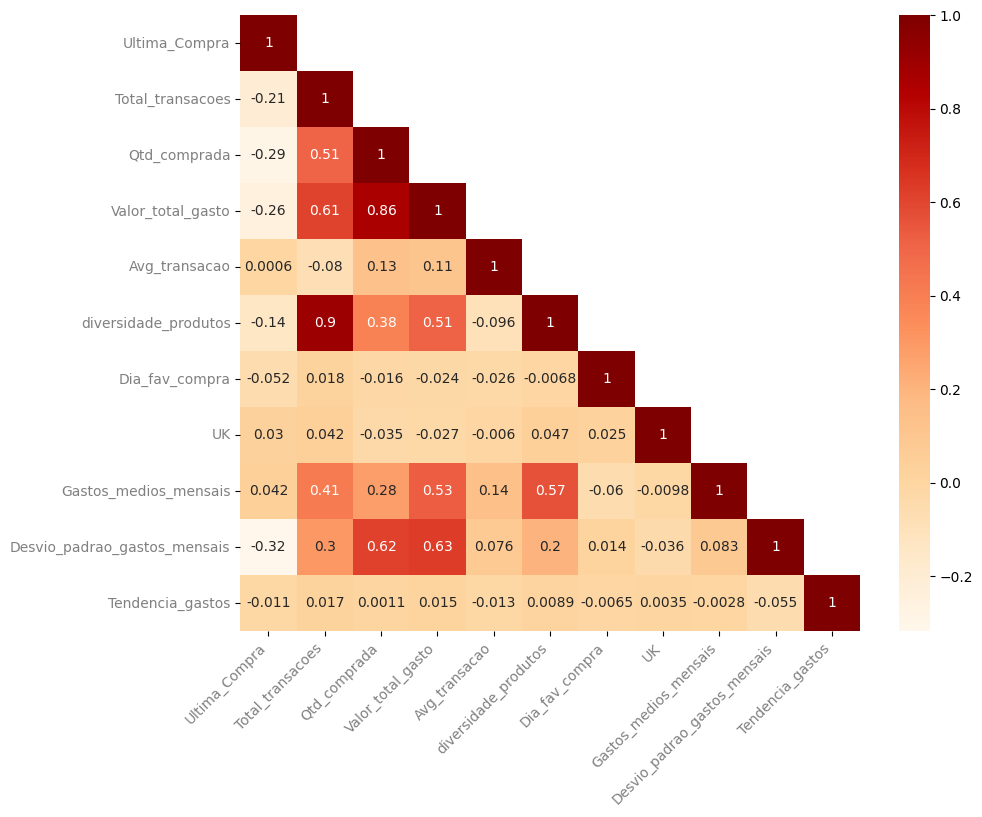

In [124]:

matrix_corr = dados_clientes.drop(columns=['Cod_cliente', 'Outlier']).corr()

# Set the diagonal values to 1
np.fill_diagonal(matrix_corr.values, 1)

# Aplicando máscara ao 
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask, k=1)] = True


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=matrix_corr,mask = mask, annot=True, cmap='OrRd')
plt.yticks(color = 'grey')
plt.xticks(rotation=45, ha='right', color = 'grey')

# Show the plot
plt.show()

## Conclusões a respeito da correlação

- Valor total gasto e quantidade comprada possuem correlação alta: 0.86
- Outras variáveis possuem correlação considerável, mas por serem variáveis importantes, irei realizar o teste mantendo-as

In [55]:
dados_clientes = dados_clientes.drop(columns = ['Qtd_comprada'])

In [56]:
# Excluindo a variavel outlier
dados_clientes = dados_clientes.drop(columns = ['Outlier'])

In [57]:
# Salvando DF para o Pré Processamento dos dados
dados_clientes.to_csv('../data/dados_clientes_para_pre_processing.csv', sep =',', index = False, encoding = 'utf-8')